In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pprint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import pyplot as plt


base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/";

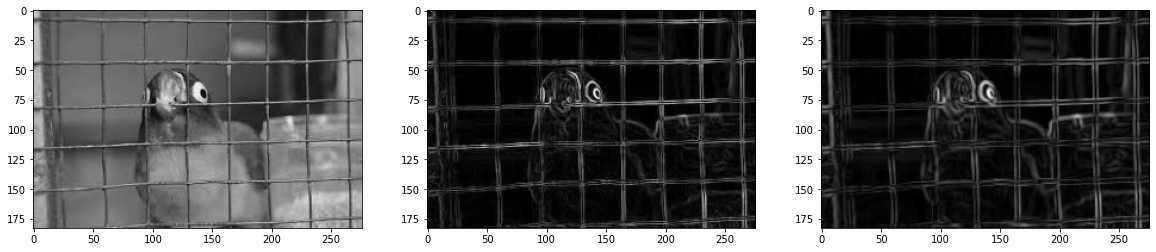

In [2]:
img = cv.imread(base + "bird-cage.jpg",0).astype(np.float32)
assert img is not None

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img,cmap="gray")

sv3 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
sh3 = sv3.T
img_x3 = cv.filter2D(img,-1,sh3)
img_y3 = cv.filter2D(img,-1,sv3)
img_grad3 = np.sqrt(img_x3**2+img_y3**2)
img_grad3_norm = np.array(img_grad3*255/np.max(img_grad3),dtype=np.uint8)


sv5 = np.array([[-2,-2,-4,-2,-2],
               [-1,-1,-2,-1,-1],
               [0,0,0,0,0],
               [1,1,2,1,1],
               [2,2,4,2,2]],np.float32)
sh5 = sv5.T
img_x5 = cv.filter2D(img,-1,sh5)
img_y5 = cv.filter2D(img,-1,sv5)
img_grad5 = np.sqrt(img_x5**2+img_y5**2)

ax[1].imshow(img_grad3,cmap="gray")
ax[2].imshow(img_grad5,cmap="gray")



[[[148.           0.7853982 ]]

 [[153.           0.7853982 ]]

 [[141.           0.7853982 ]]

 ...

 [[  1.           0.7330383 ]]

 [[322.           0.7853982 ]]

 [[321.           0.80285144]]]


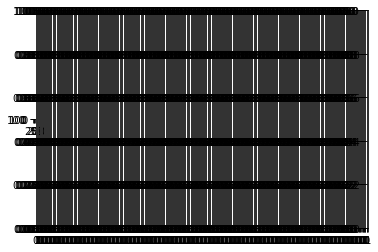

In [3]:
fig,ax = plt.subplots(1,255)
ax[0].imshow(img)
lines = cv.HoughLines(img_grad3_norm,1,np.pi/180,2)
print(lines)
for line in lines:
    rho,theta =line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0+1000*(-b)),int(y0+1000*a)
    x2,y2=int(x0-1000*(-b)),int(y0-1000*a)
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

ax[1].imshow(img)


(45, 1, 2)


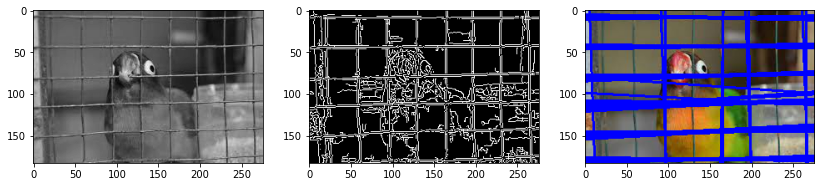

In [5]:

im = cv.imread(base + "bird-cage.jpg",cv.IMREAD_COLOR)
assert im is not None
im = cv.cvtColor(im,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,10,120,apertureSize=3)
lines=cv.HoughLines(edges,1,np.pi/180,105)

print(lines.shape)


for line in lines:
  rho,theta=line[0]
  a=np.cos(theta)
  b=np.sin(theta)
  x0,y0=a*rho,b*rho
  x1,y1=int(x0+1000*(-b)),int(y0+1000*a)
  x2,y2=int(x0-1000*(-b)),int(y0-1000*a)
  cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax= plt.subplots(1,3,figsize=(14,6))
ax[0].imshow(gray,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(edges,cmap='gray',vmin=0,vmax=255)
ax[2].imshow(im)

Text(0.5, 1.0, 'Hough circles')

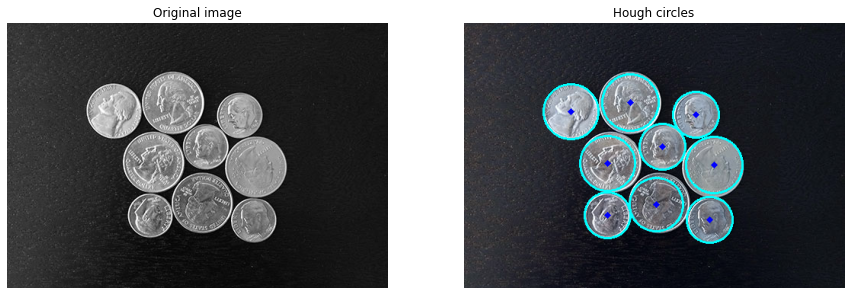

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/coins.jpg',
               cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1=150, param2=20, minRadius=29, maxRadius=38)
circles = np.uint16(np.round(circles))

for i in circles[0, :]:
    cv.circle(im, (i[0], i[1]), i[2], (0, 255, 255), 2)
    cv.circle(im, (i[0], i[1]), 2, (0, 0, 255), 3)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(gray, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original image")
ax[1].imshow(im)
ax[1].axis('off')
ax[1].set_title("Hough circles")

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


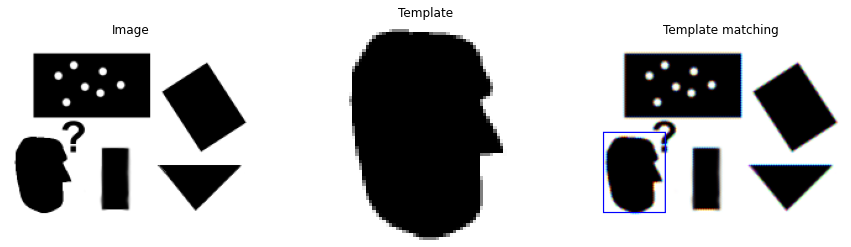

In [8]:
img = cv.imread(r'D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ = cv.imread(r'D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(img, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1]/ 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0, 0, 255))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].imshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Image")
ax[1].imshow(templ, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Template")
ax[2].imshow(out)
ax[2].axis('off')
ax[2].set_title("Template matching")
plt.show()